In [2]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
%matplotlib inline

import seaborn as sns
sns.set_theme()

In [3]:
def load_barriers(sysname):
    """Load the barrier data."""
    if sysname == "wt_d1":
        barrier = numpy.load("/users/chaoy/scratch/0.proj_kpc/1.sample/1.kpc_wt_d1/7.sp/0.b3lyp_d3/charge_ene/enes_all_paths.npz")['ene_barrier']
    if sysname == "wt_d2":
        barrier = numpy.load("/users/chaoy/scratch/0.proj_kpc/1.sample/0.kpc_wt_d2/7.sp/0.b3lyp_d3/charge_ene/enes_all_paths.npz")['ene_barrier']
    if sysname == "y72_d1":
        barrier = numpy.load("/users/chaoy/scratch/0.proj_kpc/1.sample/3.kpc_y72_d1/7.sp/0.b3lyp_d3/charge_ene/enes_all_paths.npz")['ene_barrier']
    if sysname == "y72_d2":
        barrier = numpy.load("/users/chaoy/scratch/0.proj_kpc/1.sample/2.kpc_y72_d2/7.sp/0.b3lyp_d3/charge_ene/enes_all_paths.npz")['ene_barrier']
    return barrier

def compute_aver(barriers):
    """Compute barrier averages"""
    # mean average
    mean_aver = sum(barriers)/len(barriers)
    
    # exponential average
    R = 0.001987204258 # kcal/mol/K
    T = 310            # K
    expo_aver = -(R * T) * math.log( sum([pow(math.e, -b/R/T) for b in barriers]) / len(barriers) )
    
    minpath = min(barriers)
    medn    = numpy.median(barriers)
    
    return minpath, mean_aver, expo_aver, medn

9.240124129978714
16.72000000020489
37.612749999978114
19.653373798018244
37.41499999980442


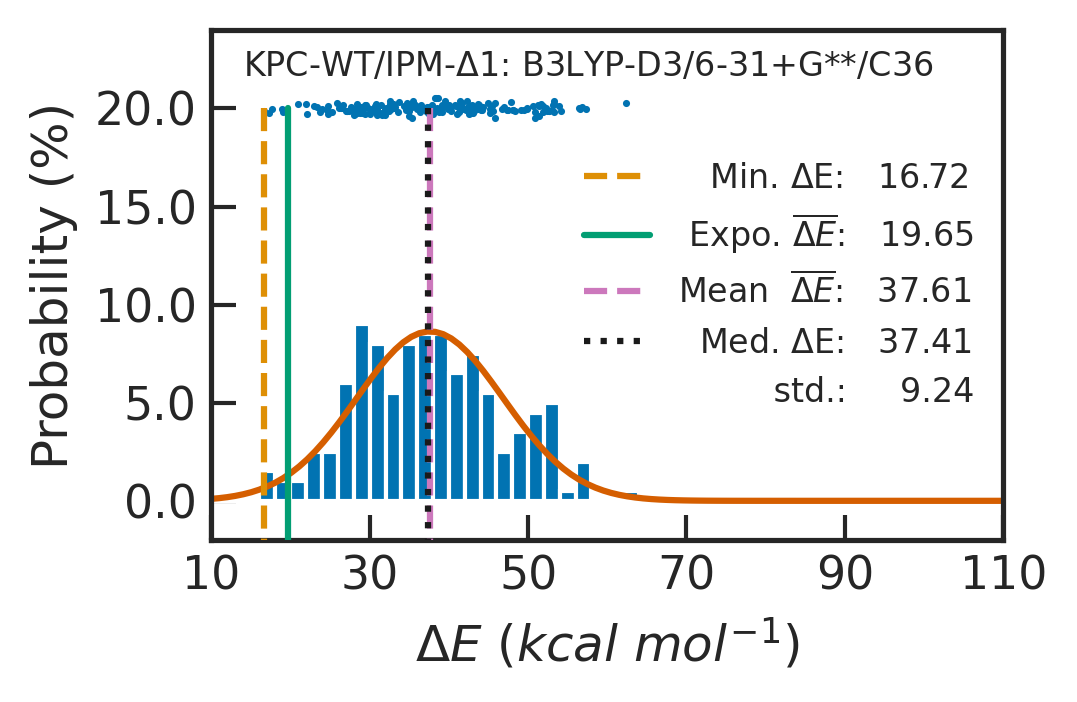

In [4]:
# init figure ==================================================================
sns.set_style(style='white')
sns.set_style("ticks")
fig, ax,  = plt.subplots(figsize=(3.75, 2.5),dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./3.75, right=3.5/3.75, top=2.25/2.5, bottom=.25/2.5)
ax.set_xlim(10, 110)
ax.set_ylim(-0.01, 0.12)

plt.xticks([ 20.*x+10 for x in range(6)])
plt.yticks([.025*y for y in range(5)])

ax.set_xlabel(r'$\Delta$$E$'+r' $(kcal$ $mol^{-1})$')
ax.set_ylabel(r'Probability (%)')

# tick & labels on x and y
ax.tick_params(which='major', direction='in', length=6, width=1)

# load dftb data ================================================================
sysname='wt_d1'
barriers=load_barriers(sysname)

# from scipy import stats
# print(stats.kstest(numpy.asarray((barriers-numpy.mean(barriers))/numpy.std(barriers)), 'norm', N=200))
# print(stats.shapiro(numpy.asarray(barriers)))
# print(stats.anderson(barriers))
# print(stats.normaltest(numpy.asarray((barriers-numpy.mean(barriers))/numpy.std(barriers))))

minp, mean, expo, medn = compute_aver(barriers)
print(numpy.std(barriers))

lminp = '   Min. ' +r'$\Delta$E: '             + '  {0:.2f}'.format(minp)
lexpo = ' Expo. '+r'$\overline{\Delta E}$: ' + '  {0:.2f}'.format(expo)
lmean = 'Mean  '+r'$\overline{\Delta E}$: ' + '  {0:.2f}'.format(mean)
lmedn = '  Med. ' +r'$\Delta$E: '             + '  {0:.2f}'.format(medn)
lstd  = '         std.:   '                          + '  {0:.2f}'.format(numpy.std(barriers))

ax.plot([minp, minp], [0.1,  -0.01], ls='--', color=sns.color_palette('colorblind')[1], label=f'{lminp}', zorder=3)
ax.plot([expo, expo], [0.1,  -0.01], ls='-',  color=sns.color_palette('colorblind')[2], label=f'{lexpo}', zorder=3)
ax.plot([mean, mean], [0.1,  -0.01], ls='--', color=sns.color_palette('colorblind')[4], label=f'{lmean}', zorder=3)
ax.plot([medn, medn], [0.1,  -0.01], ls=':',  color='k',                                label=f'{lmedn}', zorder=3)
ax.plot([1],          [1],           ls='-',  color='none',                             label=f'{lstd}',  zorder=3)

ax.hist(x=barriers, bins=range(10, 110, 2), density=True, color=sns.color_palette('colorblind')[0], zorder=1)
ax.set_yticklabels([2.5*y*2 for y in range(5)])

ax.scatter(x=barriers, 
           y=numpy.random.normal(loc=.1, scale=0.001, size=len(barriers)), 
           s=.5, color=sns.color_palette('colorblind')[0], zorder=2)

ax.text(0.04, 0.96,
        r"KPC-WT/IPM-$\Delta$" + sysname[4] + ": B3LYP-D3/6-31+G**/C36", 
        ha='left', va='top', transform=ax.transAxes, fontsize=8)

# GMM density estimation
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=1)
arr = numpy.reshape(barriers, (-1, 1))
gmm.fit(arr)
arr = numpy.linspace(10, 110, 100)
density = numpy.exp(gmm.score_samples(numpy.reshape(arr, (-1, 1))))
ax.plot(arr, density, ls='-', color=sns.color_palette('colorblind')[3], zorder=2)

# legend 
legend = plt.legend(loc="upper right", bbox_to_anchor=(1., 0.8), ncol=1, prop={'size': 8}, frameon=False)

shift = max([t.get_window_extent(renderer=fig.canvas.get_renderer()).width for t in legend.get_texts()])
for t in legend.get_texts():
    t.set_ha('right') # ha is alias for horizontalalignment
    t.set_position((1,0))
# print(barriers)
print(minp)
print(mean)
print(expo)
print(medn)
plt.tight_layout()
# fig.savefig('./energy_dis/kpc_ipm.{0}.barriers.png'.format(sysname))
plt.show()